In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [42]:
df1 = pd.read_csv('ds_salaries.csv')
df = df1.copy()

In [43]:
df.shape

(607, 12)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [45]:
df.drop('Unnamed: 0' ,axis = 1 , inplace = True)

In [46]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [47]:
df_cat = df.select_dtypes(include = 'O')
df_num = df.select_dtypes(exclude = 'O') 

In [48]:
df_cat.columns

Index(['experience_level', 'employment_type', 'job_title', 'salary_currency',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

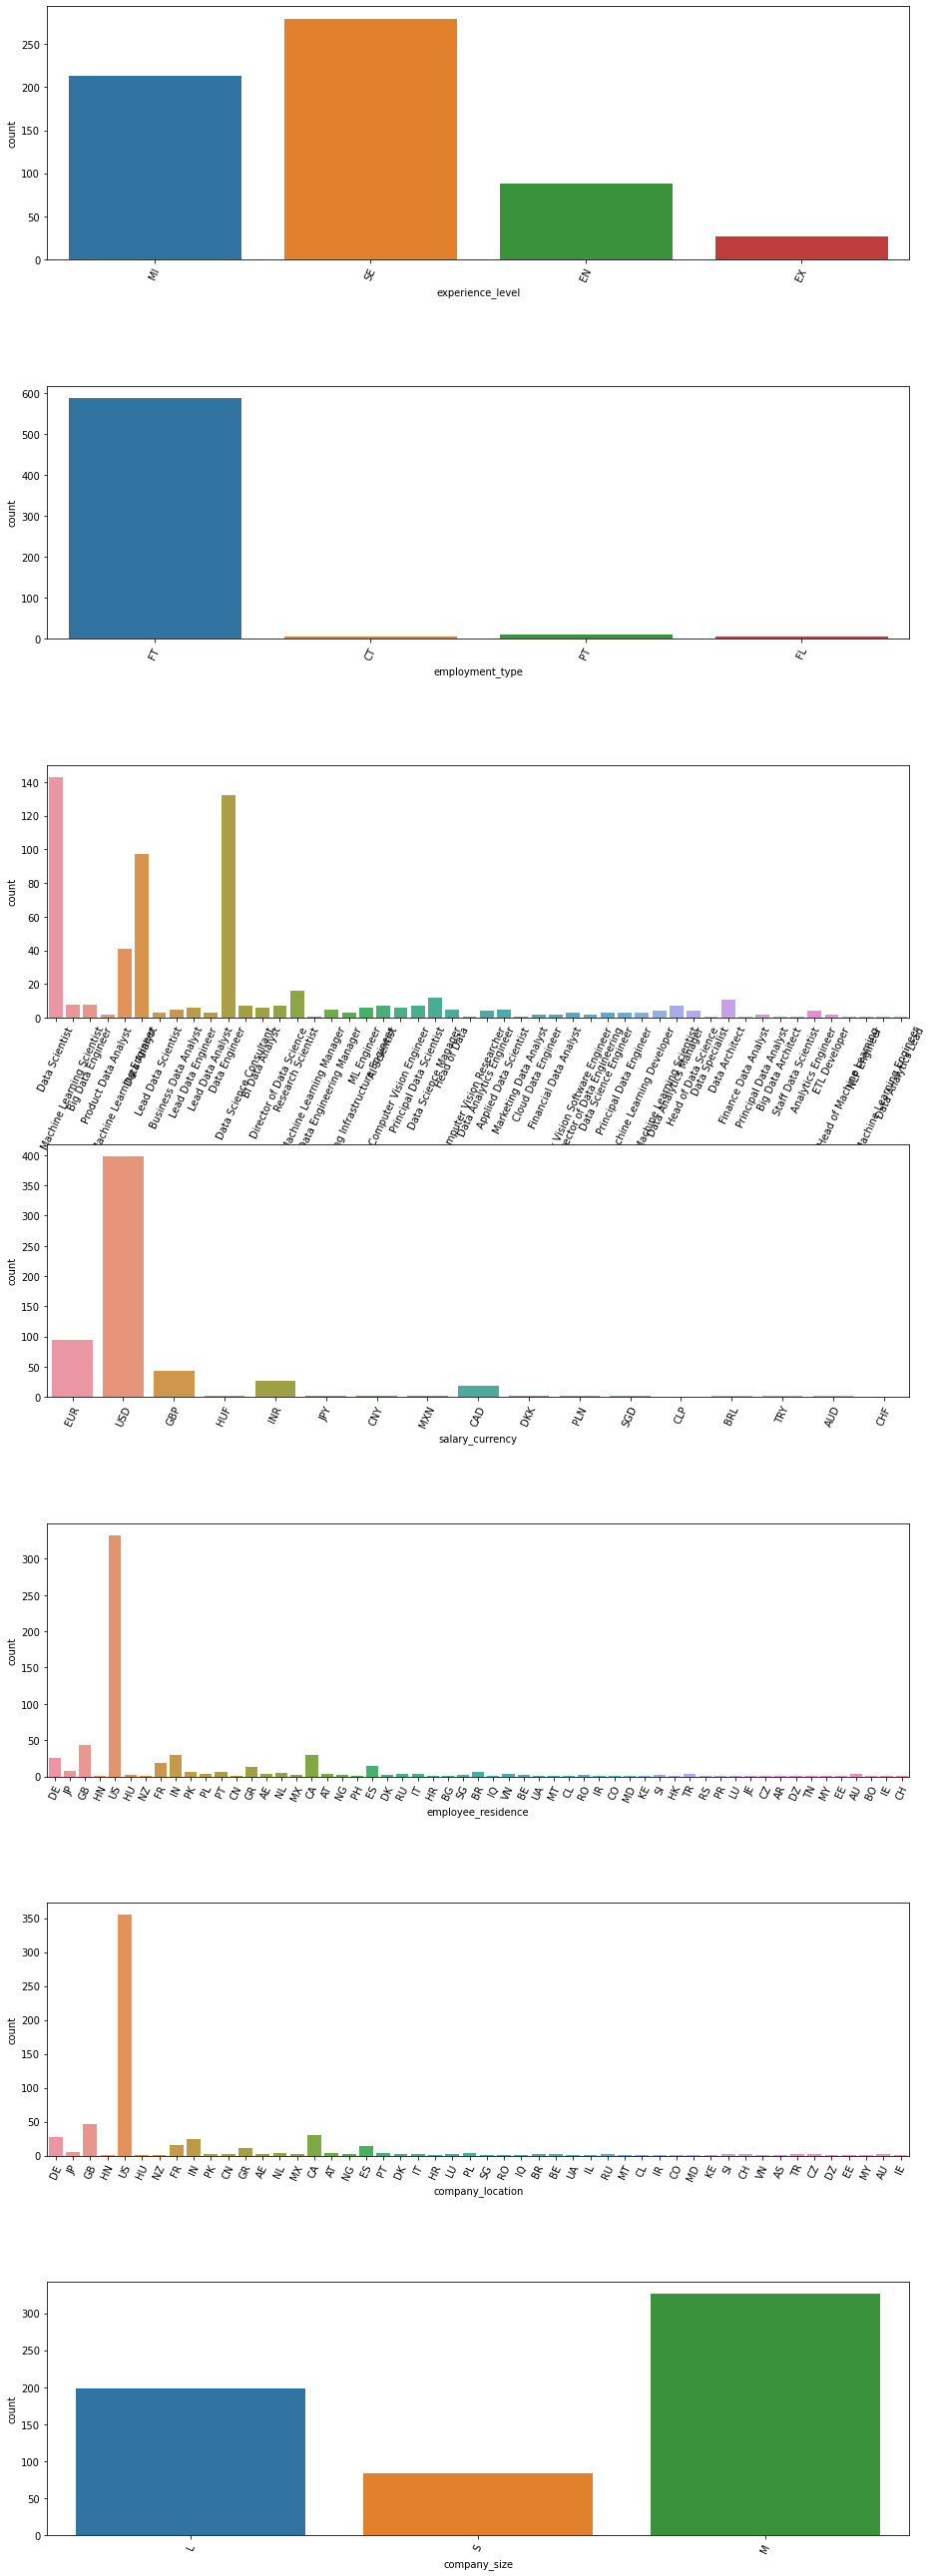

In [49]:
plt.figure(figsize = (15 , 8))
plt.subplots_adjust(left = 0.1 , 
                   bottom = 0.1,
                   right = 0.9 , 
                   top = 4.5, 
                   wspace = 0.3 , 
                   hspace = 0.5) 
for i , col in enumerate(df_cat.columns):
    plt.subplot(len(df_cat.columns) , 1 , i+1)

    sns.countplot(x = col , data = df_cat)   
    plt.xticks(rotation = 65) 

In [50]:
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

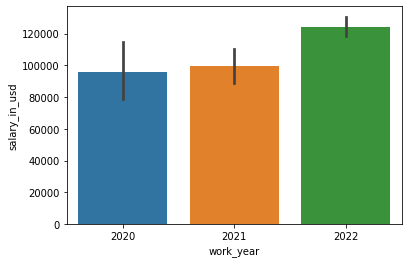

In [51]:
sns.barplot(x = 'work_year' , y = 'salary_in_usd' , data = df) 

In [52]:
df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

<AxesSubplot:xlabel='job_title', ylabel='salary_in_usd'>

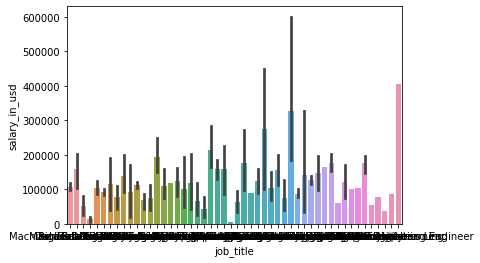

In [57]:
sns.barplot(x = 'job_title' , y = 'salary_in_usd' , data= df) 

In [55]:
df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False) 

job_title
Data Analytics Lead                         405000.000000
Principal Data Engineer                     328333.333333
Financial Data Analyst                      275000.000000
Principal Data Scientist                    215242.428571
Director of Data Science                    195074.000000
Data Architect                              177873.909091
Applied Data Scientist                      175655.000000
Analytics Engineer                          175000.000000
Data Specialist                             165000.000000
Head of Data                                160162.600000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Applied Machine Learning Scientist          142068.750000
Lead Data Engineer                          139724.500000
Data Analytics Manager                      127134.285714
Clou

In [40]:
df[df['job_title']=='Data Analyst' ]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
14,2020,MI,FT,Data Analyst,85000,USD,85000,US,100,US,L
15,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L
34,2020,MI,FT,Data Analyst,41000,EUR,46759,FR,50,FR,L
38,2020,EN,FT,Data Analyst,10000,USD,10000,NG,100,NG,S
...,...,...,...,...,...,...,...,...,...,...,...
597,2022,SE,FT,Data Analyst,170000,USD,170000,US,100,US,M
600,2022,EN,FT,Data Analyst,67000,USD,67000,CA,0,CA,M
601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
